# Gaussian Processes

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [24]:
# Training data is 100 points in [0,1] inclusive regularly spaced
train_x = np.linspace(0, 1, 100)
# True function is sin(2*pi*x) with Gaussian noise
train_y = np.sin(train_x * (2 * math.pi)) + np.random.randn(len(train_x)) * math.sqrt(0.04)

Text(0.5, 1.0, 'Generated Data')

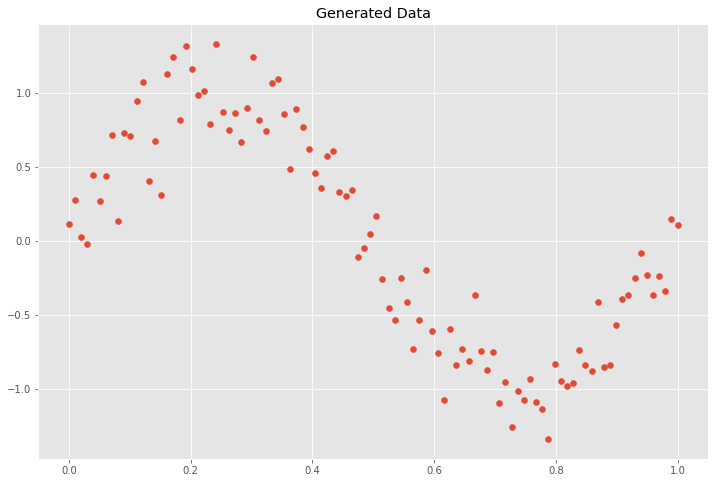

In [26]:
plt.scatter(train_x, train_y)
plt.title('Generated Data')

In [ ]:
## TODO: example with noise

# Gaussian Processes regression: basic introductory example
[scikit-learn example link](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py)

### Links:

https://scikit-learn.org/stable/auto_examples/index.html#gaussian-process-for-machine-learning

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.gaussian_process

https://scikit-learn.org/stable/modules/gaussian_process.html

https://distill.pub/2019/visual-exploration-gaussian-processes

http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote15.html

In [48]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [81]:
np.random.seed(1)

def f(x):
    """The function to predict."""
    return x * np.sin(x)

In [82]:
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

In [188]:
# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

In [84]:
# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

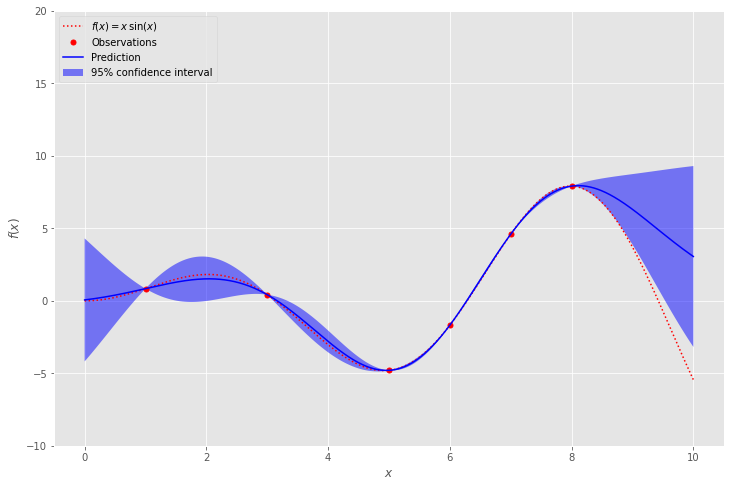

In [85]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

In [104]:
# plt.fill_between(x.ravel(),
#                  y_pred - 1.9600 * sigma,
#                  y_pred + 1.9600 * sigma)

# Implement it!

In [117]:
X

array([[1.],
       [3.],
       [5.],
       [6.],
       [7.],
       [8.]])

In [103]:
y

array([ 0.84147098,  0.42336002, -4.79462137, -1.67649299,  4.59890619,
        7.91486597])

In [229]:
# 1. define kernel function
# 2. compute kernel matrix

In [134]:
def rbf(x, z, sigma=1.0):    
    return np.exp(-(x-z)**2/sigma**2)

Text(0.5, 1.0, 'RBF')

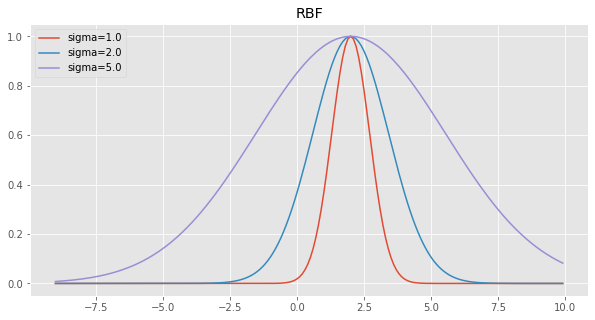

In [182]:
x = np.arange(-9, 10, 0.1)
z = np.array([2] * len(x))

plt.figure(figsize=(10,5))
plt.plot(x, rbf(x,z), label='sigma=1.0')
plt.plot(x, rbf(x,z,2.0), label='sigma=2.0')
plt.plot(x, rbf(x,2,5.0), label='sigma=5.0')

plt.legend(loc='upper left')
plt.title('RBF')

In [156]:
K = X.dot(X.T)
K.shape

(6, 6)

In [157]:
K

array([[ 1.,  3.,  5.,  6.,  7.,  8.],
       [ 3.,  9., 15., 18., 21., 24.],
       [ 5., 15., 25., 30., 35., 40.],
       [ 6., 18., 30., 36., 42., 48.],
       [ 7., 21., 35., 42., 49., 56.],
       [ 8., 24., 40., 48., 56., 64.]])

In [166]:
# np.linalg.inv(K)
# LinAlgError: Singular matrix

In [250]:
grid = np.meshgrid(X,X)
K = rbf(grid[0],grid[1])
K_I = np.linalg.inv(K)
K.shape, K_I.shape

((6, 6), (6, 6))

In [251]:
alpha = K_I.dot(y)
alpha.shape

(6,)

In [252]:
K_star = rbf(X,x.T,1)
y_pred_2 = K_star.T.dot(K_I.dot(y))
X.shape, x.T.shape, K_star.shape

((6, 1), (1, 1000), (6, 1000))

In [256]:
test_grid = np.meshgrid(x,x)
K_star2 = rbf(test_grid[0], test_grid[1])
K_star2.shape

(1000, 1000)

In [257]:
sigma = K_star2 - K_star.T.dot(K_I.dot(K_star))
sigma.shape

(1000, 1000)

In [260]:
variance = np.diag(sigma)
variance.shape

(1000,)

In [274]:
def plot_gp(pred, sigma):
    plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
    plt.plot(x, pred, 'g-', label='Prediction')
    plt.fill_between(x.ravel(),
                     pred - 1.9600 * sigma,
                     pred + 1.9600 * sigma,
                     alpha=.5, fc='g',
                     label='95% confidence interval')

    plt.plot(X, y, 'r.', markersize=12, label='Observations')

    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.ylim(-10, 15)
    plt.legend(loc='upper left')

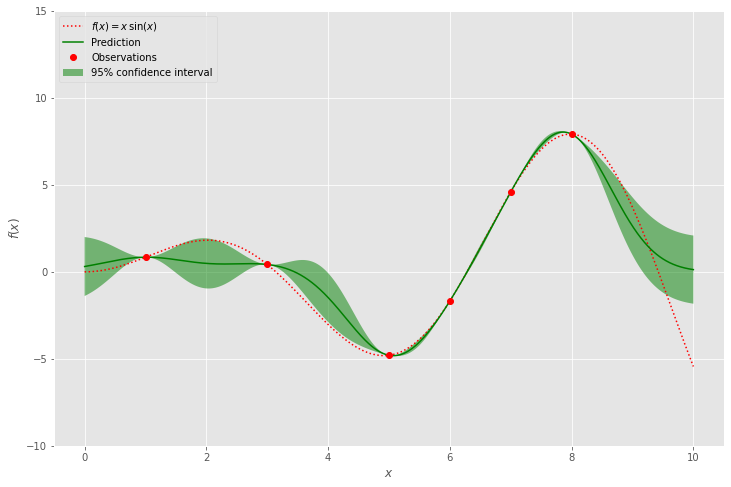

In [275]:
plot_gp(y_pred_2, variance)

In [276]:
def get_preds(s=1.0):
    K = rbf(grid[0],grid[1],s)
    K_I = np.linalg.inv(K)
    K_star = rbf(X,x.T,s)
    
    K_star2 = rbf(test_grid[0], test_grid[1],s)
    sigma = K_star2 - K_star.T.dot(K_I.dot(K_star))
    
    return K_star.T.dot(K_I.dot(y)), np.diag(sigma)

In [277]:
y_pred_3, sigma_3 = get_preds(0.3)
y_pred_4, sigma_4 = get_preds(2) # when h. param tuning works
y_pred_5, sigma_5 = get_preds(5)

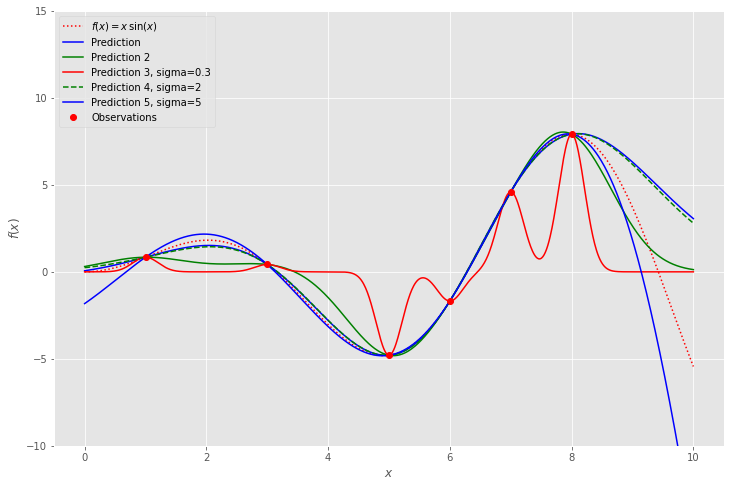

In [278]:
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.plot(x, y_pred_2, 'g-', label='Prediction 2')
plt.plot(x, y_pred_3, 'r-', label='Prediction 3, sigma=0.3')
plt.plot(x, y_pred_4, 'g--', label='Prediction 4, sigma=2')
plt.plot(x, y_pred_5, 'b-', label='Prediction 5, sigma=5')
plt.plot(X, y, 'r.', markersize=12, label='Observations')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 15)
plt.legend(loc='upper left')

In [292]:
def plot_gp(pred, sigma, ax):
    ax.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
    ax.plot(x, pred, 'g-', label='Prediction')
    ax.fill_between(x.ravel(),
                     pred - 1.9600 * sigma,
                     pred + 1.9600 * sigma,
                     alpha=.5, fc='g',
                     label='95% confidence interval')

    ax.plot(X, y, 'r.', markersize=12, label='Observations')

#     ax.xlabel('$x$')
#     ax.ylabel('$f(x)$')
#     ax.ylim(-10, 15)
#     ax.legend(loc='upper left')

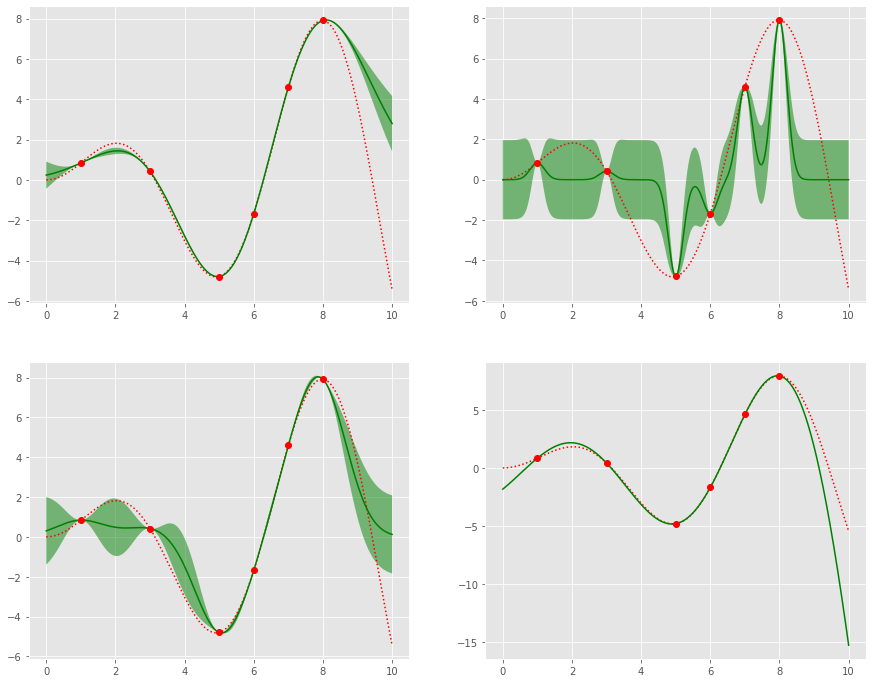

In [299]:
_, axes = plt.subplots(2, 2, figsize=(15,12))

plot_gp(y_pred_4, sigma_4, axes[0,0])
plot_gp(y_pred_3, sigma_3, axes[0,1])
plot_gp(y_pred_2, variance, axes[1,0])
plot_gp(y_pred_5, sigma_5, axes[1,1])

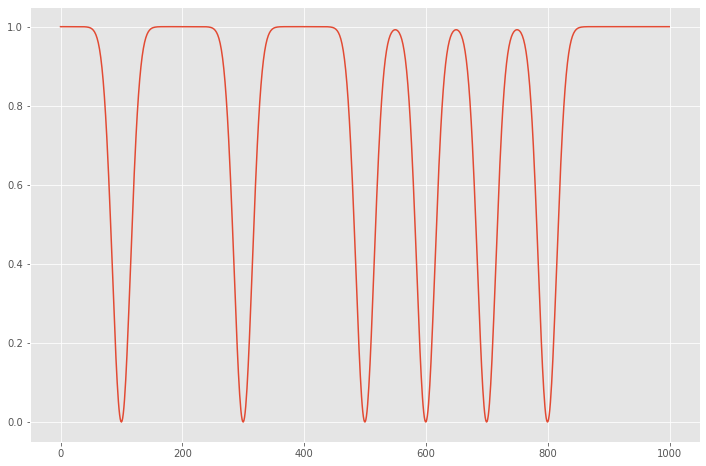

In [304]:
plt.plot(sigma_3)

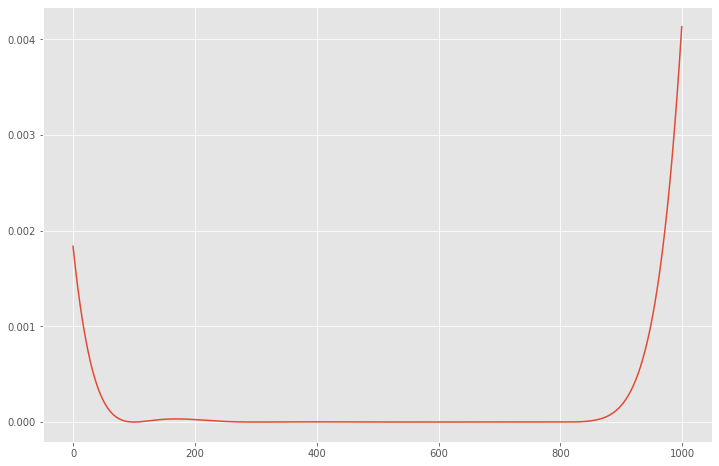

In [303]:
plt.plot(sigma_5)

In [ ]:
# incerase dataset size and look at np.linalg.inv time
# draw gauss around train points

# kNN lecture
# kNN VS Universal Approximator

# GP/SVM RBF is able to find almost perfect(by comlexity and/or accuracy) classifier/regressor
# you need only to find hyperparams
# find hp using Bayesian Optimization.